# Сборный проект. Анализ и предсказание продаж по компьютерным играм.

## <a name="0.0"></a>Содержание :

* [1. (Шаг 1) Ознакомление с данными:](#1.)
   
* [2. (Шаг 2) Подготовка данных:](#2.)
     
* [3. (Шаг 3) Подготовка данных:](#3.)
     
* [4. (Шаг 4) Портрет пользователя регионов NA, EU, JP:](#4.)
     
* [5. (Шаг 5) Проверка гипотез:](#5.)
* [6. (Шаг 6) Общий вывод](#6.)

### Введение
Цель исследования — определить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Кроме того необходимо проверить две гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

План работы:

- Просмотреть таблицу и выявить аномалии и пропущенные значения.
- Провести предобработку таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
- Провести анализ по данным и подготовить актуальные данные.
- Составить портреты пользователей для крупных регионов продаж.
- Выполнить проверку гипотез.
- Оформить проект и сделать выводы по каждому шагу.

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить  цель исследования. Пример можно посмотреть в самом первом проекте (Музыка городов)
</div>
<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
Привет Василий рад снова работать с тобой)   
Сделал
</div>

<br/><a name="1."></a>
### Шаг 1. 

In [1]:


import pandas as pd
import warnings
import numpy as np
warnings.simplefilter('ignore')
from scipy import stats as st

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение.
</div>

In [2]:
try:
    games_sales = pd.read_csv('games.csv', sep=',')
except:
    games_sales = pd.read_csv('/datasets/games.csv', sep=',')
games_sales.head(10)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 Здорово, что следишь за универсальностью загрузки данных и используешь `try-except` блок.
</div>

In [3]:
games_sales.dtypes

Unnamed: 0           int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [4]:
#функция для получения общей информации о датафрейме
def df_inf(data): 
    display(data.head())
    display(data.describe())
    display(data.info())
    for column in data.columns:
        display()
        display(column)
        display(data[column].unique())
    display(data[data.duplicated()])
    display(pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm') )

In [5]:
df_inf(games_sales)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Unnamed: 0,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16715.00000,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,8357.00000,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,4825.34921,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,0.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,4178.50000,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,8357.00000,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,12535.50000,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,16714.00000,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


None

'Unnamed: 0'

array([    0,     1,     2, ..., 16712, 16713, 16714])

'Name'

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

'Platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'Year_of_Release'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

'Genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

'NA_sales'

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

'EU_sales'

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

'JP_sales'

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

'Other_sales'

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

'Critic_Score'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

'User_Score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'Rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


,0
Unnamed: 0,0.000000
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000


### Вывод
Предварительно изучив данные видим что существуют значительные доли пропусков  в Critic_Score,User_Score,Rating.
Кроме того есть незначительные пропуски в Year_of_Release,возможно будет их восстановить/удалить. Также странные данные по минимальным продажам - так в первом квартиле в  NA_sales EU_sales JP_sales Other_sales продажи составляли 0 , продажи в JP_sales  составляют 0 даже в медиане .  Year_of_Release надо поменять тип данных User_Score   и  Rating  тоже для оптимизации памяти сейчас занимает  1.4+ MB
после проверки уникальных значений в столбцах замечены следующие аномалии:
-  'Year_of_Release' nan
- 'Genre'  nan
- 'Critic_Score' nan
- 'User_Score' nan, 'tbd' , '0' Аномалия tbd. Расшифровывается с английского "to be defined" - будт определено в будущем. То есть отзывов недостаточно чтобы дать оценку и она будет дана в будущем
- 'Rating'  nan
 
 


<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 Хорошая вводная часть.
</div>

<br/><a name="2."></a>
### Шаг 2

Шаг 2.
1. Замените названия столбцов (приведите к нижнему регистру);
2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
3. Обработайте пропуски при необходимости
4. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 Опишите причины, которые могли привести к пропускам;
5. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
6. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Обработка пропусков
Определение значимых и восстанавливаемых пропусков данных:

Возможно восстановить
year_of_release. В ходе шага 1 при изучении данных видел в некоторых названиях  год. 
Не требующие восстановления
Строки 659 и 14244. Они будут удалены.
Невозможно восстановить
critic_score и user_score. Слишком много пропусков и к тому же оценки носят уникальный характер и зависят от игры и заполнить медианным значением по жанру или платформе или еще какому то критерию на мой взгляд неверно.



### 1 приведение к нижнему регистру

In [6]:
def lower(name):
    name=name.lower()
    return name
games_sales=games_sales.rename(columns=lower)
# привел к нижнему регистру 

In [7]:
games_sales.columns

Index(['unnamed: 0', 'name', 'platform', 'year_of_release', 'genre',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating'],
      dtype='object')

In [8]:
games_sales.dtypes

unnamed: 0           int64
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

### 2
Изменение типа данных
Изменения требуют столбцы:

- year_of_release и critic_score в тип integer. 

- user_score в тип float. Строковое значение "tbd" можно заменить на NaN так как оно означает что сейчас оценки нет.
однако сделаем это позже после так как сначала надо избавится от NaN

In [9]:
games_sales.duplicated().sum()

0

Ищем дубликаты 

In [10]:
games_sales[games_sales.duplicated(['name','year_of_release','genre','critic_score'])].sort_values('name').head(15)

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
1785,1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
9507,9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
7890,7890,3rd Super Robot Wars Z Jigoku Hen,PSV,2014.0,Role-Playing,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8820,8820,3rd Super Robot Wars Z: Tengoku-Hen,PS3,2015.0,Action,0.00,0.00,0.15,0.00,NaN,NaN,NaN
15237,15237,428: Fuusa Sareta Shibuya de,PS3,2009.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
3190,3190,A Bug's Life,N64,1998.0,Platform,0.49,0.13,0.00,0.01,NaN,NaN,NaN
8688,8688,AC/DC LIVE: Rock Band Track Pack,PS2,2008.0,Misc,0.08,0.06,0.00,0.02,NaN,tbd,T
11773,11773,AKB1/149: Love Election,PSV,2012.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
4355,4355,ATV Quad Power Racing 2,XB,2003.0,Racing,0.36,0.07,0.00,0.01,68.0,tbd,E


In [11]:
games_sales[games_sales.duplicated(['name','year_of_release','platform','genre','critic_score'])].sort_values('name').head(15)

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E
14244,14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN


In [12]:
games_sales[games_sales['name'] == 'Madden NFL 13']

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [13]:
games_sales = games_sales.drop (index=16230) 

Удалили дубликат

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 Отличная работа с дубликатами.
</div>

### 3
Обработаем пропуски 

In [14]:
games_sales.isna().sum()

unnamed: 0            0
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
games_sales = games_sales.dropna(subset=['name'])

In [16]:
games_sales[games_sales['year_of_release'].isna()].sort_values('na_sales', ascending=False).head(30)

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
719,719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T


In [17]:
games_sales[games_sales['year_of_release'].isna()].describe()

,unnamed: 0,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,269.000000,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,8769.561338,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,4746.198635,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,183.000000,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,4945.000000,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,8547.000000,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,12896.000000,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,16522.000000,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


Видим что некоторые года релиза можно найти по названию, остальные удалим так как эти игры по продажам невелики - половина набрала всего до 90 тысяч долларов

In [18]:
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       16712 non-null  int64  
 1   name             16712 non-null  object 
 2   platform         16712 non-null  object 
 3   year_of_release  16443 non-null  float64
 4   genre            16712 non-null  object 
 5   na_sales         16712 non-null  float64
 6   eu_sales         16712 non-null  float64
 7   jp_sales         16712 non-null  float64
 8   other_sales      16712 non-null  float64
 9   critic_score     8136 non-null   float64
 10  user_score       10013 non-null  object 
 11  rating           9948 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.7+ MB


In [19]:
games_sales = games_sales.dropna(subset=['year_of_release'])

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

Преобразовали  games_sales в целое

In [20]:
games_sales['year_of_release'] = games_sales['year_of_release'].astype('int')

In [21]:
games_sales.query('user_score=="tbd"')
# to be determined то есть анологично что данных не будет то есть Nan поэтому заменим на NaN

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [22]:
games_sales.query('critic_score.isna() and user_score.isna() and rating.isna()').groupby('platform').platform.count()/games_sales.groupby('platform').platform.count()

platform
2600    1.000000
3DO     1.000000
3DS     0.556641
DC      0.730769
DS      0.399811
GB      1.000000
GBA     0.366215
GC      0.156827
GEN     1.000000
GG      1.000000
N64     1.000000
NES     1.000000
NG      1.000000
PC      0.148380
PCFX    1.000000
PS      0.823529
PS2     0.314528
PS3     0.272797
PS4     0.318878
PSP     0.549036
PSV     0.648019
SAT     1.000000
SCD     1.000000
SNES    1.000000
TG16    1.000000
WS      1.000000
Wii     0.236392
WiiU    0.285714
X360    0.158279
XB      0.105853
XOne    0.214575
Name: platform, dtype: float64

Есть платформы где данных по оценкам вообще нет  , это преимущественно старые платформы , однако и у новых платформ есть сравнительно высокое значение пропусков  в оценках

Преобразовали остальные столбцы также здесь сразу выполнен пункт 5

In [23]:
games_sales['user_score'] = games_sales['user_score'].replace('tbd', np.NaN)
games_sales['user_score'] = games_sales['user_score'].astype('float')
games_sales['user_score'] = games_sales['user_score'].fillna(-1)

Решил заменить пропуски в user_score на -1 для того чтобы не удалять строки так как их слишком много и в тоже время выделить эти данные , кроме того меняю тип данных в столбцах user_score ,critic_score

In [24]:
games_sales['critic_score'] = games_sales['critic_score'].fillna(-1)
games_sales['critic_score'] = games_sales['critic_score'].astype('float')

Также заменяю пропуски в ['critic_score'] на -1

пропуски в rating заменяю на no_rating

In [25]:
games_sales['rating'] = games_sales['rating'].fillna("no_rating")

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 Верное решение
</div>

In [26]:
games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  int64  
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     16443 non-null  float64
 10  user_score       16443 non-null  float64
 11  rating           16443 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [27]:
games_sales.isna().sum()

unnamed: 0         0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [28]:
games_sales.pivot_table(index='platform',values=['critic_score','user_score'],aggfunc={'count','mean'})


critic_score            user_score          
                count       mean      count      mean
platform                                             
2600              116  -1.000000        116 -1.000000
3DO                 3  -1.000000          3 -1.000000
3DS               512  21.097656        512  1.622461
DC                 52  22.788462         52  1.565385
DS               2121  20.606789       2121  0.936634
GB                 97  -1.000000         97 -1.000000
GBA               811  35.219482        811  1.683107
GC                542  55.924354        542  4.674908
GEN                27  -1.000000         27 -1.000000
GG                  1  -1.000000          1 -1.000000
N64               316  -1.000000        316 -1.000000
NES                98  -1.000000         98 -1.000000
NG                 12  -1.000000         12 -1.000000
PC                957  55.188088        957  5.363427
PCFX                1  -1.000000          1 -1.000000
PS               1190  10.955462       1190  0.183613
PS2              2127  40.789375       2127  3.947297
PS3              1305  42.967050       1305  4.088123
PS4               392  45.987245        392  4.079847
PSP              1193  25.196144       1193  1.886002
PSV               429  18.897436        429  1.758741
SAT               173  -1.000000        173 -1.000000
SCD                 6  -1.000000          6 -1.000000
SNES              239  -1.000000        239 -1.000000
TG16                2  -1.000000          2 -1.000000
WS                  6  -1.000000          6 -1.000000
Wii              1286  27.169518       1286  2.297356
WiiU              147  42.918367        147  4.376871
X360             1232  49.567370       1232  4.891477
XB                803  61.346202        803  5.062017
XOne              247  49.854251        247  4.542105

In [29]:
games_sales.platform.value_counts(normalize=True)

PS2     0.129356
DS      0.128991
PS3     0.079365
Wii     0.078210
X360    0.074926
PSP     0.072554
PS      0.072371
PC      0.058201
GBA     0.049322
XB      0.048835
GC      0.032962
3DS     0.031138
PSV     0.026090
PS4     0.023840
N64     0.019218
XOne    0.015022
SNES    0.014535
SAT     0.010521
WiiU    0.008940
2600    0.007055
NES     0.005960
GB      0.005899
DC      0.003162
GEN     0.001642
NG      0.000730
WS      0.000365
SCD     0.000365
3DO     0.000182
TG16    0.000122
PCFX    0.000061
GG      0.000061
Name: platform, dtype: float64

In [30]:
games_sales = games_sales.dropna(subset=['name'])
#удалил игры без названия, так как продажи маленькие и по сумме продаж не восстановить название

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Согласен
</div>

### 6. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [31]:
games_sales['world_sales']=games_sales['na_sales']+games_sales['eu_sales']+games_sales['jp_sales']+games_sales['other_sales']
display(games_sales)

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16711,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,no_rating,0.01
16712,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16713,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,no_rating,0.01


### Вывод :
Таким образом в ходе предобработки данных были найдены и обработаны аномалии, найдены и обработаны пропуски , был создан новый столбец

Случайный тип аномалии:

Пропуски в столбцах Name и Genre. Это строки 659 и 14244. 
Пропуск в столбце Year_of_Release. Аггрегатор игр мог и не получить информацию от создателей или издателей игр, или были проблемы с выгрузкой данных с разных баз данных

Неслучайный тип аномалии

Пропуски в столбцах Critic_Score, User_Score и Rating. Пропуски в этих столбцах преимущественно у игр с маленькой выручкой , а также у более старых игр. Предположительно в то время оценки могли не собираться

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Отлично! Приступим к исследовательскому анализу.
</div>

<br/><a name="3."></a>
### Шаг 3.

Шаг 3. Проведите исследовательский анализ данных
1.Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2.Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3.Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
4.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
5.Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
6.Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
7.Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### 1
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [32]:
games_sales.groupby('year_of_release').name.count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

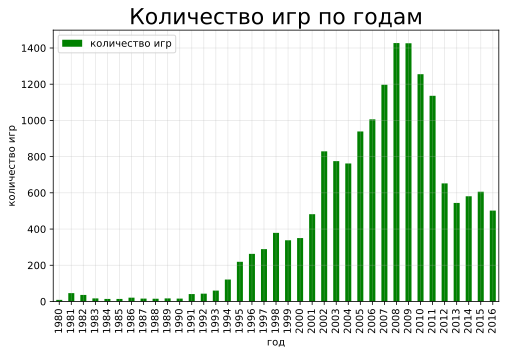

In [33]:
ax=games_sales.groupby('year_of_release').name.count().plot(kind='bar', label='количество игр', color="g")
ax.set_title('Количество игр по годам', fontsize=22)
ax.set(xlabel='год', ylabel='количество игр');
plt.legend()
plt.grid(axis='both', alpha=.3)

Видно что резкий рост выпускаемых игр платформами был с 2002 года , и в 2008 был пик , затем под влиянием кризиса 2008 рынок игр резко упал и не смог восстановится . Так как игры выпускаются 2-3 года, а некоторые и больше 5 то основное падение было после 2011 года хотя кризис был в 2009

In [34]:
games_sales.groupby('platform').world_sales.sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: world_sales, dtype: float64

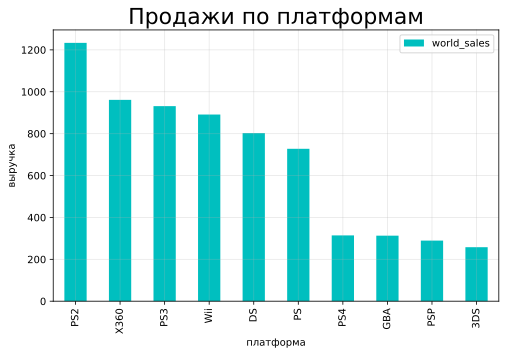

In [35]:
ax=games_sales.groupby('platform').world_sales.sum().sort_values(ascending=False).head(10).plot(kind='bar',color="c")
ax.set_title('Продажи по платформам', fontsize=22)
ax.set(xlabel='платформа', ylabel='выручка');
plt.legend()
plt.grid(axis='both', alpha=.3)

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
✍ 
Очень не хватает визуализации расчетов.
</div>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.3</b> 
    
👍 

</div>

### 2 ,3
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

В наибольшие платформы по суммарным продажам выберем 6 платформ так как их продажи значимо больше чем другие и после 6 платформы резкий спад продаж

In [36]:
games_sales.groupby('platform').world_sales.sum().sort_values(ascending=False).index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG',
       'PCFX'],
      dtype='object', name='platform')

In [37]:
games_sales.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']").groupby(['platform','year_of_release']).world_sales.sum()

platform  year_of_release
DS        1985                 0.02
          2004                17.27
          2005               130.14
          2006               119.81
          2007               146.94
                              ...  
X360      2012                99.74
          2013                88.58
          2014                34.74
          2015                11.96
          2016                 1.52
Name: world_sales, Length: 71, dtype: float64

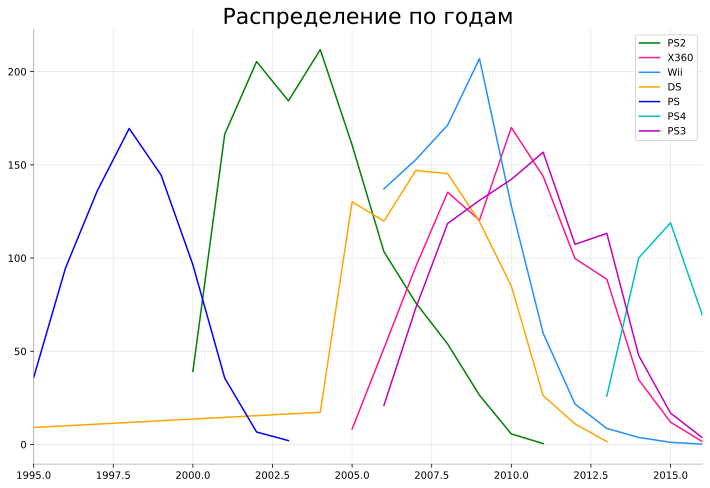

In [38]:
plt.figure(figsize=(12,8), dpi= 80)

plt.plot(games_sales.query("platform == 'PS2'").groupby('year_of_release').world_sales.sum(), color="g", label='PS2')
plt.plot(games_sales.query("platform == 'X360'").groupby('year_of_release').world_sales.sum(), color="deeppink", label='X360')
plt.plot(games_sales.query("platform == 'Wii'").groupby('year_of_release').world_sales.sum(), color="dodgerblue", label='Wii')
plt.plot(games_sales.query("platform == 'DS'").groupby('year_of_release').world_sales.sum(), color="orange", label='DS' )
plt.plot(games_sales.query("platform == 'PS'").groupby('year_of_release').world_sales.sum(), color="blue", label='PS')
plt.plot(games_sales.query("platform == 'PS4'").groupby('year_of_release').world_sales.sum(), color="c", label='PS4')
plt.plot(games_sales.query("platform == 'PS3'").groupby('year_of_release').world_sales.sum(), color="m", label='PS3')
plt.title('Распределение по годам', fontsize=22)                                 
plt.legend()
plt.grid(axis='both', alpha=.3)
plt.xlim([1995,2016])
# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show();

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

In [39]:
games_sales.query("platform == 'DS' and year_of_release==1985 ")
games_sales= games_sales.drop(index =15957)
games_sales.query("platform == 'DS' and year_of_release==1985 ")

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales


In [40]:
games_sales.query('year_of_release>=2014').groupby(['platform','year_of_release']).world_sales.sum()

platform  year_of_release
3DS       2014                43.76
          2015                27.78
          2016                15.14
PC        2014                13.28
          2015                 8.52
          2016                 5.25
PS3       2014                47.76
          2015                16.82
          2016                 3.60
PS4       2014               100.00
          2015               118.90
          2016                69.25
PSP       2014                 0.24
          2015                 0.12
PSV       2014                11.90
          2015                 6.25
          2016                 4.25
Wii       2014                 3.75
          2015                 1.14
          2016                 0.18
WiiU      2014                22.03
          2015                16.35
          2016                 4.60
X360      2014                34.74
          2015                11.96
          2016                 1.52
XOne      2014                54.07
  

###### 
После размышлений  решил определить актуальный период период с 2012 года по 2016 год, так как достаточно платформ и продажи примерно равны чтобы данные были равномерно распределены. От более ранних данных решил отказать так как во первых цены взяты в номинальном отношении без поправки на инфляцию во вторых данные платформ более ранних периодов менее содержательны так как много пропусков и в третьих тенденции на рынке мобильных игр слишком изменяются со временем.Кроме того в этих годах наблюдаются негативные тенденции  которые будут продолжаться в периоде прогноза в отличие от предшедтсвующего периода когда платформы стремительно росли

In [41]:
games_sales_actual = games_sales.query('year_of_release>=2012 ')

In [42]:
games_sales.columns

Index(['unnamed: 0', 'name', 'platform', 'year_of_release', 'genre',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating', 'world_sales'],
      dtype='object')

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.'PS4''PS3''X360'


Платформы появляются и исчезают за срок примерно в 8-11 лет

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Жизненный цикл определен верно.
</div>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.3</b> 
    
👍 

</div>

### 5
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [43]:
def make_boxplot(df,column = 'world_sales', query_param = None, ylims=None):
    if query_param != None:
        x=df.query(query_param)
        ax=x.boxplot(column = column) 
    else:
        ax=df.boxplot(column = column) 
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)    
    
    
    

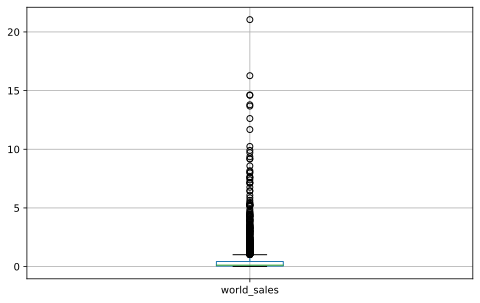

In [44]:
make_boxplot(games_sales_actual)

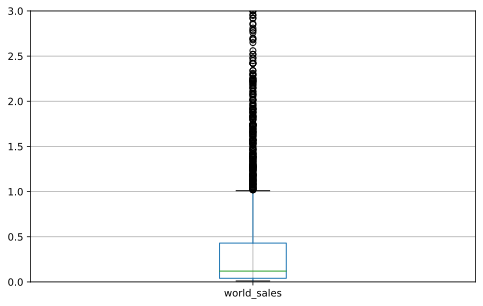

In [45]:
make_boxplot(games_sales_actual,ylims=[0,3])

'график «ящик с усами» по глобальным продажам игр по платформе"X360"'

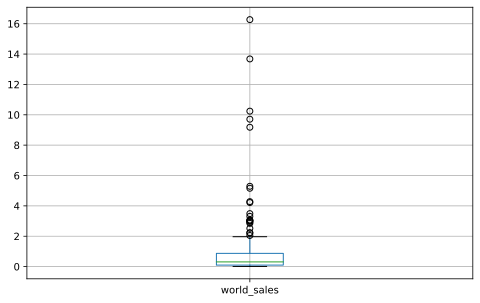

'график «ящик с усами» по глобальным продажам игр по платформе"PS3"'

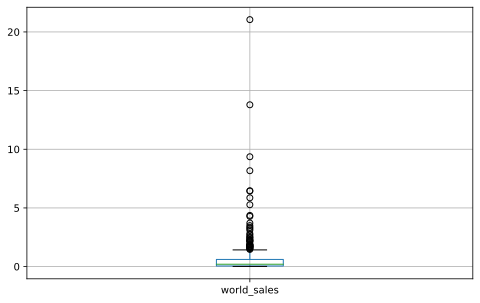

'график «ящик с усами» по глобальным продажам игр по платформе"Wii"'

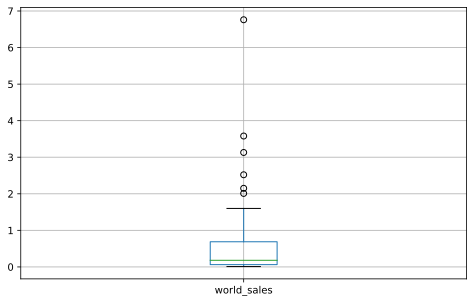

'график «ящик с усами» по глобальным продажам игр по платформе"DS"'

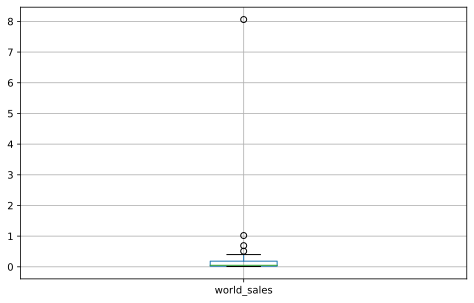

'график «ящик с усами» по глобальным продажам игр по платформе"PS4"'

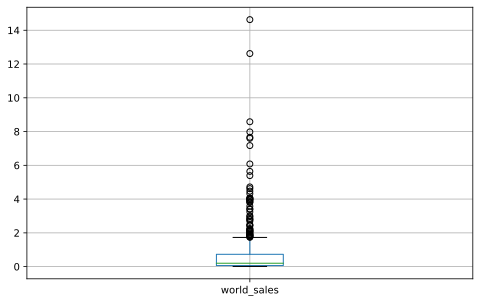

In [46]:
for i in [ 'platform == "X360"', 'platform == "PS3"', 'platform == "Wii"', 'platform == "DS"',  'platform == "PS4"']:
    display( 'график «ящик с усами» по глобальным продажам игр по платформе' + i.split()[2])
    make_boxplot(games_sales_actual,query_param=i)
    plt.show()

Сделаем ограничение по размеру выручки чтобы посмотреть на самые распространенные данные без выбросов

'график «ящик с усами» по глобальным продажам игр по платформе"X360"'

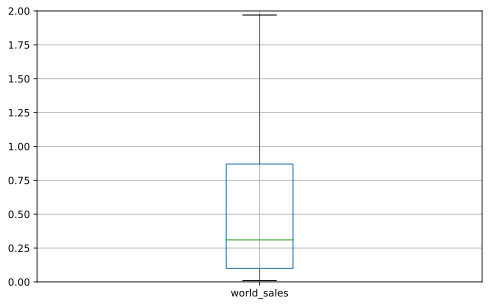

'график «ящик с усами» по глобальным продажам игр по платформе"PS3"'

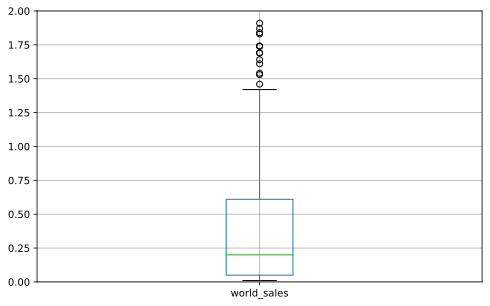

'график «ящик с усами» по глобальным продажам игр по платформе"Wii"'

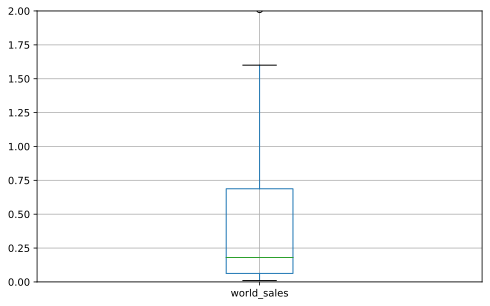

'график «ящик с усами» по глобальным продажам игр по платформе"DS"'

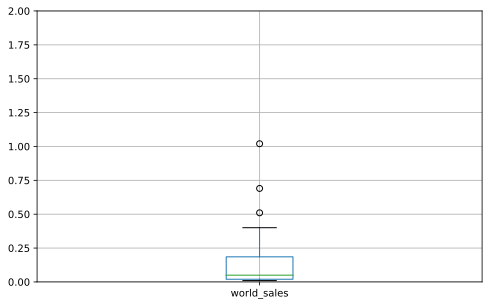

'график «ящик с усами» по глобальным продажам игр по платформе"PS4"'

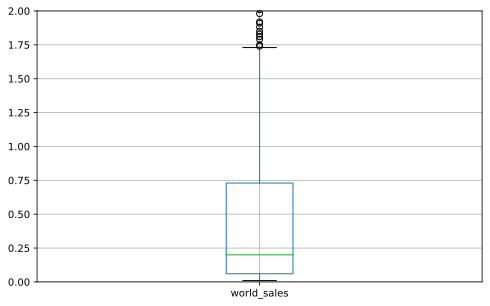

In [47]:
for i in [ 'platform == "X360"', 'platform == "PS3"', 'platform == "Wii"', 'platform == "DS"',  'platform == "PS4"']:
    display( 'график «ящик с усами» по глобальным продажам игр по платформе' + i.split()[2])
    make_boxplot(games_sales_actual,query_param=i,ylims=[0,2])
    plt.show()

В среднем, продажи игр составляют до 1,2 млн долларов. Медиана - 0,2 миллиона долларов. Однако некоторые игры во много раз превышают этот показатель. Так некоторые игры имеют обьем продаж до 20  миллионов ( такие показатели у двух платформ  "X360"', "PS3") .
Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру. У платформы "DS" показатели значительно хуже и медиана меньше 0,1 млн долларов и лишь одна игра превышает 8 млн долларов остальные меньше миллиона  долларов. Возможно это связано с тем что платформа с мобильными решениями и после 2012 года переживает значительный спад


<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Отлично
</div>

### 6
Влияние отзывов пользователей и критиков на продажи.

In [48]:
games_sales.columns

Index(['unnamed: 0', 'name', 'platform', 'year_of_release', 'genre',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating', 'world_sales'],
      dtype='object')

In [49]:
games_sales_ps4=games_sales_actual.query('platform =="PS4" and critic_score>0  ').copy()
games_sales_ps3=games_sales_actual.query('platform =="PS3" and critic_score>0 ').copy()
games_sales_X360=games_sales_actual.query('platform =="X360" and critic_score>0  ').copy()
games_sales_Wii=games_sales_actual.query('platform =="Wii" and critic_score>0  ').copy()
games_sales_DS=games_sales_actual.query('platform =="DS" and critic_score>0  ').copy()


<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Я сначала сделал здесь ограничение в query  что продажи меньше 5.5 млн но потом подумал и сделал ограничение в графике чтобы это ограничение не влияло на корреляцию
было сначала так
    
    
games_sales_DS=games_sales_actual.query('platform =="DS" and critic_score>0 and  world_sales <= 5.5').copy()
</div>

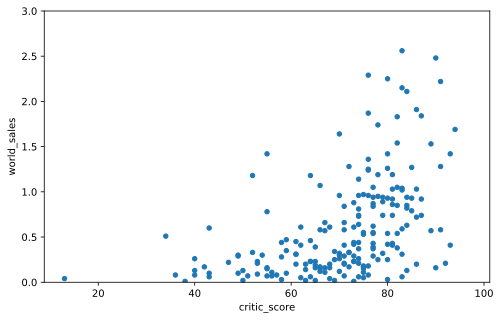

In [50]:
games_sales_ps3.plot(kind='scatter', x='critic_score', y='world_sales', ylim=[0,3]);

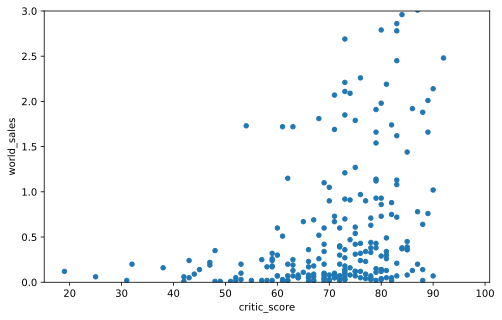

In [51]:
games_sales_ps4.plot(kind='scatter', x='critic_score', y='world_sales', ylim=[0,3]);

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр.Зависимость становится выраженной после роста рейтинга до 75-80
Теперь посмотрим зависимость от отзывов покупателей

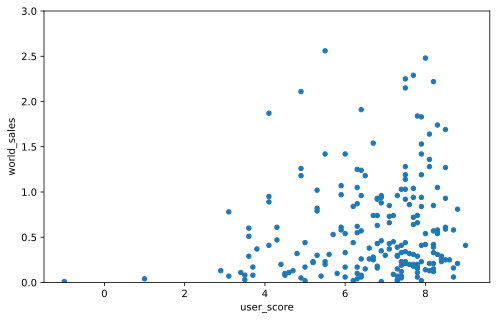

In [52]:
games_sales_ps3.plot(kind='scatter', x='user_score', y='world_sales', ylim=[0,3]);

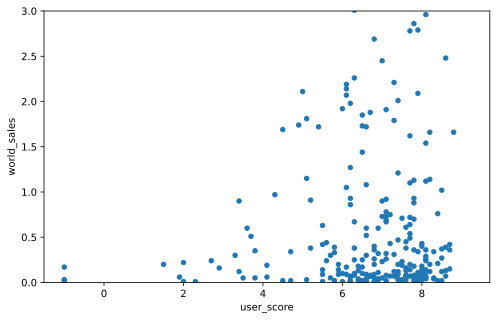

In [53]:
games_sales_ps4.plot(kind='scatter', x='user_score', y='world_sales', ylim=[0,3]);

Точно такая же картина но зависимость слабее и   выбросов больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги. Это связано с тем что чтобы оставить отзыв покупателю нужно сначала купить и поиграть в игру, а значит даже если игра будет неудачной она все равно будет куплена. Кроме того потребители могут оставлять недостоверные или субьективные отзывы и они не будут отличатся точностью отзывов критиков у которых это профессиональная деятельность

### 7.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:>

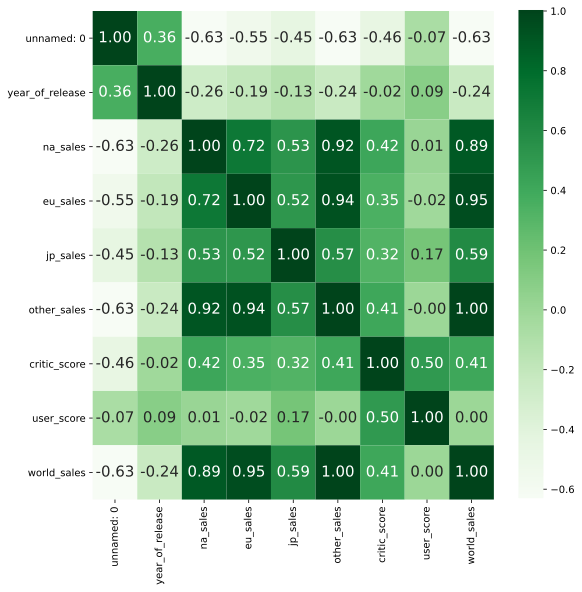

In [54]:
plt.figure(figsize=(9,9))
sns.heatmap(games_sales_ps4.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':15})

Очевидно что корреляция мировых продаж с продажами по регионам высока так как мировые продажи зависят от регионов но эта корреляция не нужна поэтому, уберем лишние признаки чтобы стало понятней

<AxesSubplot:>

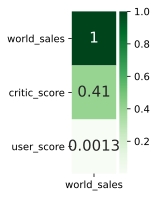

In [55]:
games_ps4_filtered = games_sales_ps4[['world_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(1,3))
sns.heatmap(games_ps4_filtered.corr()[['world_sales']], cmap="Greens", 
            annot=True, annot_kws={'size':15})

In [56]:
games_sales_X360_filtered=games_sales_X360[['world_sales' ,'critic_score', 'user_score']]
games_sales_Wii_filtered=games_sales_Wii[['world_sales' ,'critic_score', 'user_score']]
games_sales_DS_filtered=games_sales_DS[['world_sales' ,'critic_score', 'user_score']]


Посмотрел корреляцию по платформам

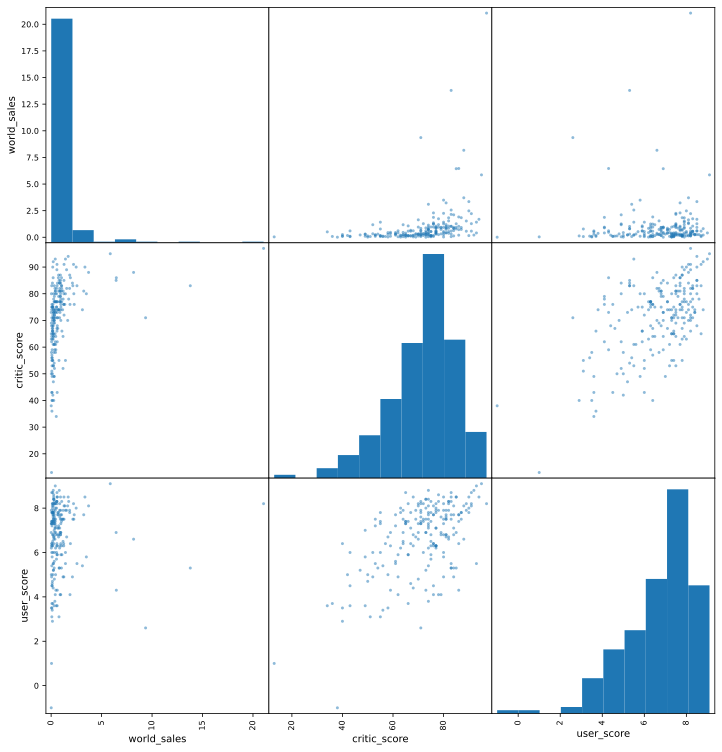

In [57]:
games_ps3_filtered = games_sales_ps3[['world_sales' ,'critic_score', 'user_score']]
pd.plotting.scatter_matrix(games_ps3_filtered, figsize=(12, 13));

In [58]:
print('games_ps4_filtered')

display(games_ps4_filtered.corr())
print()
print('games_ps3_filtered')
display(games_ps3_filtered.corr())
print()
print('games_sales_X360_filtered')
display(games_sales_X360_filtered.corr())
print()
print('games_sales_Wii_filtered')
display(games_sales_Wii_filtered.corr())
print()
print('games_sales_DS_filtered')
display(games_sales_DS_filtered.corr())

games_ps4_filtered


,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,0.001260
critic_score,0.406568,1.000000,0.496739
user_score,0.001260,0.496739,1.000000



games_ps3_filtered


,world_sales,critic_score,user_score
world_sales,1.000000,0.334152,0.012128
critic_score,0.334152,1.000000,0.563240
user_score,0.012128,0.563240,1.000000



games_sales_X360_filtered


,world_sales,critic_score,user_score
world_sales,1.000000,0.360573,-0.002014
critic_score,0.360573,1.000000,0.557352
user_score,-0.002014,0.557352,1.000000



games_sales_Wii_filtered


,world_sales,critic_score,user_score
world_sales,1.000000,-0.424341,0.009756
critic_score,-0.424341,1.000000,0.816295
user_score,0.009756,0.816295,1.000000



games_sales_DS_filtered


,world_sales,critic_score,user_score
world_sales,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
user_score,NaN,NaN,NaN


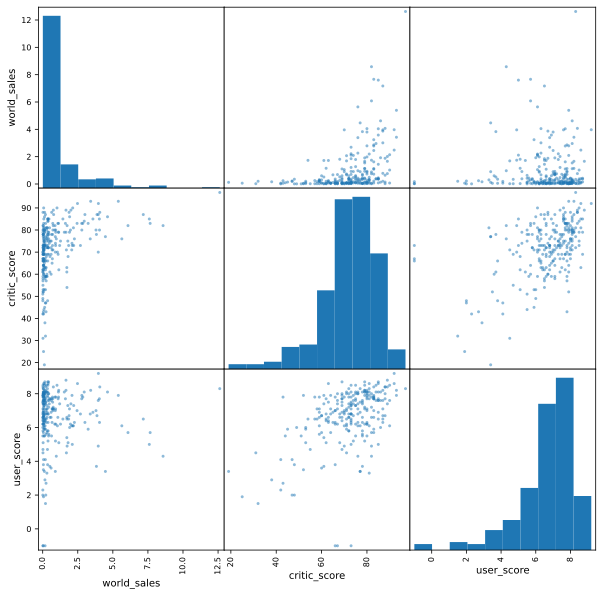

In [59]:
pd.plotting.scatter_matrix(games_ps4_filtered, figsize=(10, 10));



Для платформы PS4 важными критерием является качество игры. Поэтому есть прямая корреляция между прибылью и рейтингом критиков.
Влияние рейтинга пользователей минимально - около 14%

По платформе PS3 имеются похожие тенденции как и у PS4, только чуть сильнее.
Влияние рейтинга пользователей сильнее чем у ps4 - около 5%

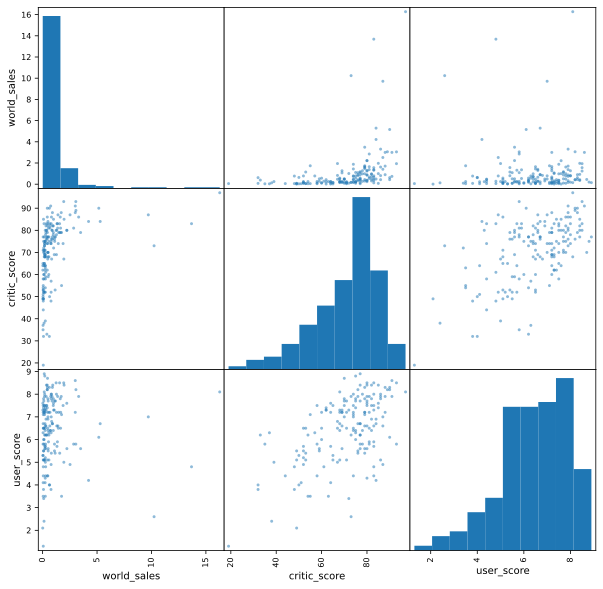

In [60]:
pd.plotting.scatter_matrix(games_sales_X360_filtered, figsize=(10, 10));

По платформе х360 имеются похожие тенденции как и у PS4, только чуть сильнее почти 50 процентов.
пользователи влияют несильно около 11 процентов 

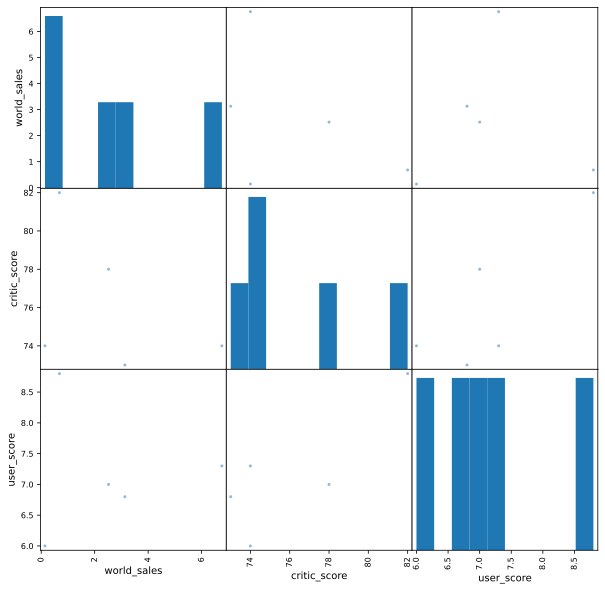

In [61]:
pd.plotting.scatter_matrix(games_sales_Wii_filtered, figsize=(10, 10));

По остальным платформам данных слишком мало но в целом тенденции одинаковые

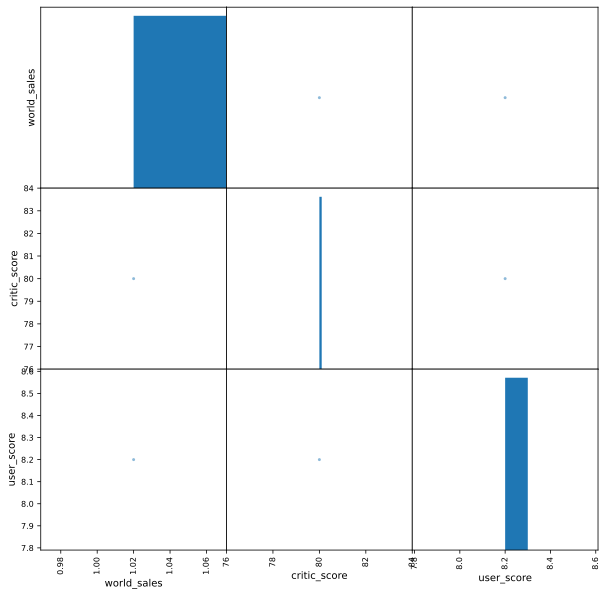

In [62]:
pd.plotting.scatter_matrix(games_sales_DS_filtered, figsize=(10, 10));

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

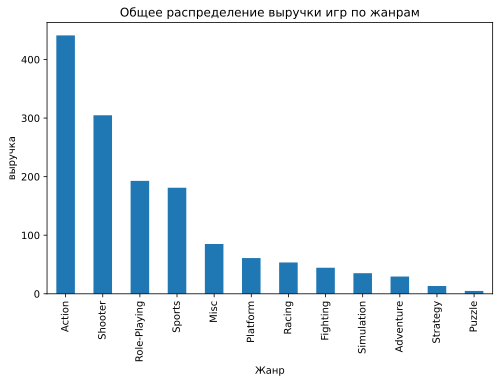

In [63]:
ax=games_sales_actual.groupby('genre').world_sales.sum().sort_values(ascending= False).plot(kind='bar')
ax.set_title('Общее распределение выручки игр по жанрам')
ax.set(xlabel='Жанр', ylabel='выручка');

Больше всего приносит выручки более простые игры для пользователей , такие как Action, Role-Playing , игры со стрельбой. Самыми низкоприбыльными играми являются стратегии прикллючения и пазлы. Однако если посмотреть на слоедующий график с корличеством игр то можно увидеть что игр с приключениями довольно много и  по количеству они находятся на третьем месте а по выручке почти в конце, то есть если конечно на рабзработку этих игр не тратиться меньше денег то они очень невыгодны .Также можно заметить что очень выгодно выпускать шутеры - по выручке они на 2 месте а по количеству гораздо меньше.
Также можно заметить что игры со статегиями по количеству почти такие же как стимуляции но по выручке в несколько раз меньше. Что важно то что на разработку таких игр скорее всего уходит очень много денег что делает их производство не такими выгодными как более простые для пользователя и масссовые по выручке игры. Игры с пазлами тоже дают мало выручки но скорее всего денег на их разработку уходит во много раз меньше чем остальные что делает их выгодными для разработки

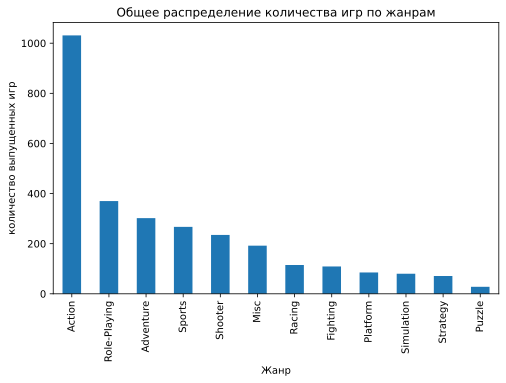

In [64]:
ax=games_sales_actual.groupby('genre').name.count().sort_values(ascending= False).plot(kind='bar')
ax.set_title('Общее распределение количества игр по жанрам')
ax.set(xlabel='Жанр', ylabel='количество выпущенных игр');

По количеству проданных копий лидеры практически те же ,за исключением того что игры смешанного жанра оказались на 3 месте . Также как видно боевиков значительно меньше по количеству и они находятся на 5 месте , при этом находясь на 3 месте по выручки, что дает основания считать выгодной разработку таких игр если они не значительно дороже в себестоимости

Посмотрим на медиану продаж игр так как многие очень дорогие игры являюся выбросами и искажают картину

'график «ящик с усами» по глобальным продажам игр по жанру"Action"'

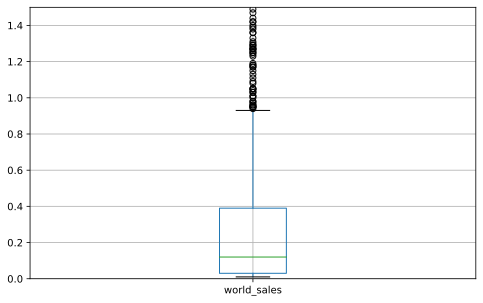

'график «ящик с усами» по глобальным продажам игр по жанру"Shooter"'

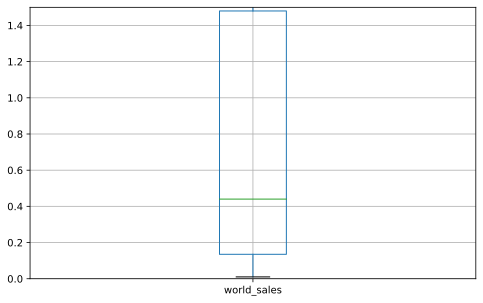

'график «ящик с усами» по глобальным продажам игр по жанру"Role-Playing"'

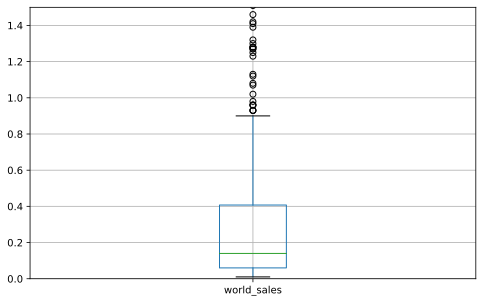

'график «ящик с усами» по глобальным продажам игр по жанру"Platform"'

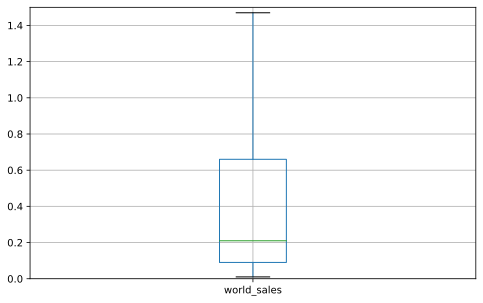

'график «ящик с усами» по глобальным продажам игр по жанру"Misc"'

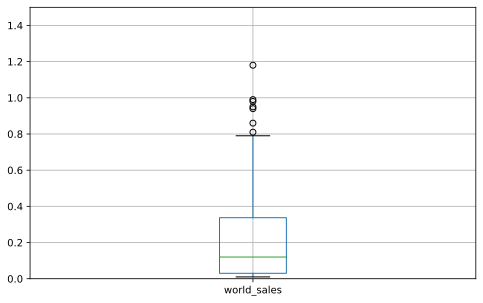

'график «ящик с усами» по глобальным продажам игр по жанру"Simulation"'

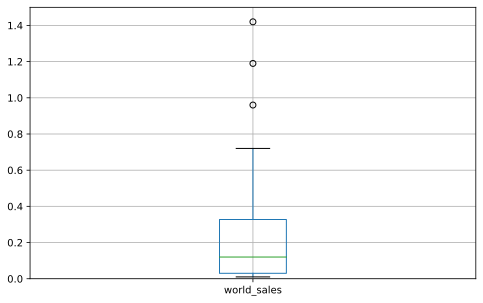

'график «ящик с усами» по глобальным продажам игр по жанру"Sports"'

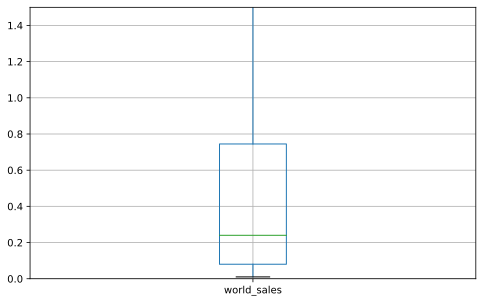

'график «ящик с усами» по глобальным продажам игр по жанру"Fighting"'

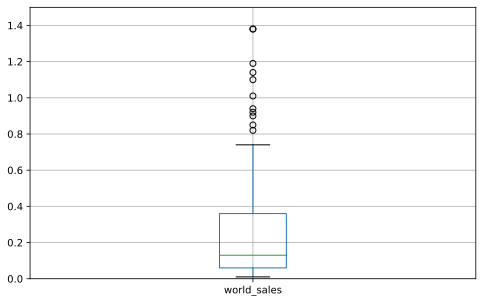

'график «ящик с усами» по глобальным продажам игр по жанру"Racing"'

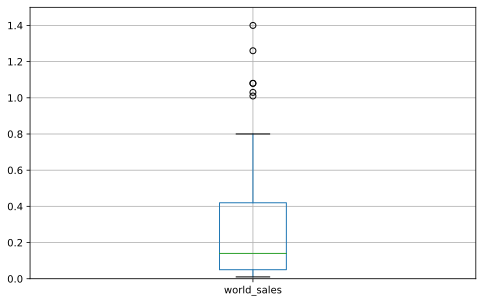

'график «ящик с усами» по глобальным продажам игр по жанру"Strategy"'

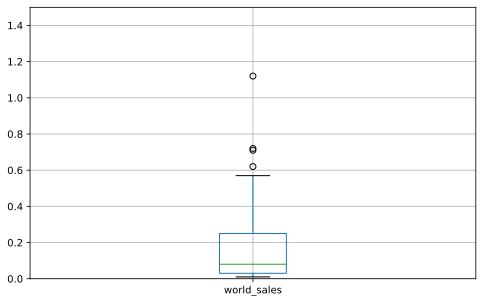

'график «ящик с усами» по глобальным продажам игр по жанру"Adventure"'

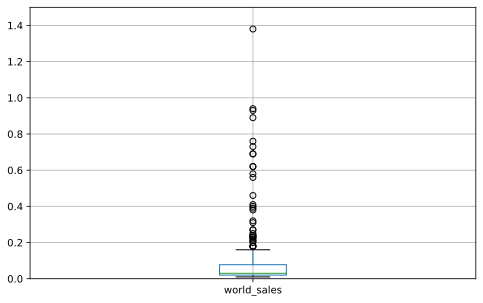

'график «ящик с усами» по глобальным продажам игр по жанру"Puzzle"'

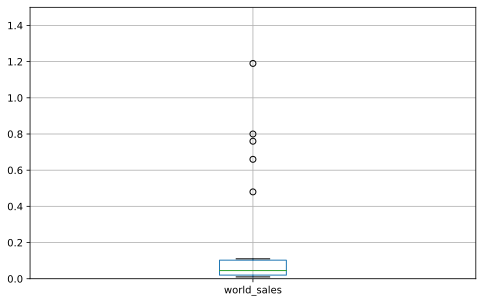

In [65]:
for i in ['genre == "Action"', 'genre == "Shooter"', 'genre == "Role-Playing"', 'genre == "Platform"', 'genre == "Misc"',
       'genre == "Simulation"', 'genre == "Sports"', 'genre == "Fighting"', 'genre == "Racing"', 'genre == "Strategy"',
       'genre == "Adventure"', 'genre == "Puzzle"']:
    display( 'график «ящик с усами» по глобальным продажам игр по жанру' + i.split()[2])
    make_boxplot(games_sales_actual,query_param=i,ylims=[0,1.5])
    plt.show()



Шутеры все также выгоды их медиана примерно 0,45 млн долларов а третий квартиль 1.5 млн долларов,
Жанр Platform тоже довольно таки выгоден , несмотря на то что медиана чуть больше 0,2 млн долларов третий квартиль находится на 0,7 млн долларов что значительно выше чем у остальных платформ 
 жанр "Sports" также весьма перспективен, медиана чуть больше 0.2 млн долларов а третий квартиль чуть меньше 0.8 млн долларов
    Остальные игры не столь перспективны, разве что жанр Пазлов  так как медиана там хоть и низкая но себестоимость у игр маленькая

### Выводы

Был проведен исследовательский анализ данных:
- Были проанализирована динамика выпуска игр за разные годы и определен наиболее показательный период для исследования 2005-2016 год.
- Были проанализированы продажи по платформам , построено распределение по годам и выбраны платформы с наибольшими суммарными продажами. Было определено что платформы появляются и исчезают за срок примерно в 8-10 лет
-  Были постоены графики «ящик с усами» по глобальным продажам игр в разбивке по платформам
- Была проанализирована зависимость отзывов критиков и пользователей и выручки от игр- и выявлено что зависимость существует и отзывы критиков влияют на выручку больше чем отзывы пользователей . Также была построена диаграмма рассеивания и посчитаны корреляции  между отзывами и продажами
- Были проаналищированы продажи игр по жанрам и определены наиболее выгодные жанры для производителей 


<br/><a name="4."></a>
### Шаг 4.

Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

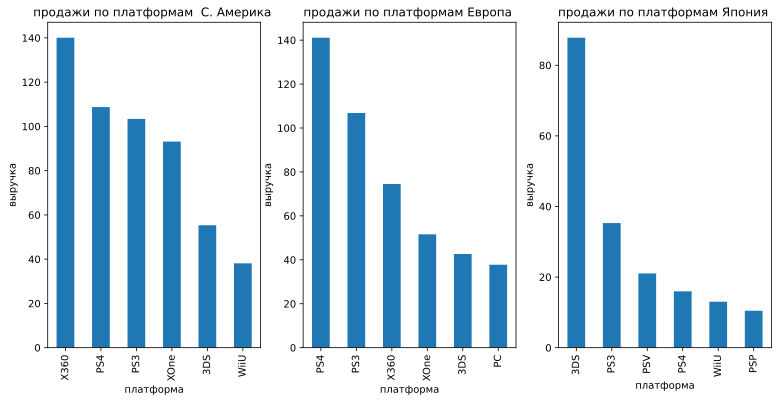

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(13,6))
ax=games_sales_actual.groupby('platform').na_sales.sum().sort_values(ascending= False).head(6).plot(kind='bar',ax=axes[0])
ax.set_title('продажи по платформам  С. Америка ')
ax.set(xlabel='платформа', ylabel='выручка');
ax=games_sales_actual.groupby('platform').eu_sales.sum().sort_values(ascending= False).head(6).plot(kind='bar',ax=axes[1])
ax.set_title('продажи по платформам Европа ')
ax.set(xlabel='платформа', ylabel='выручка');
ax=games_sales_actual.groupby('platform').jp_sales.sum().sort_values(ascending= False).head(6).plot(kind='bar',ax=axes[2])
ax.set_title('продажи по платформам Япония ')
ax.set(xlabel='платформа', ylabel='выручка');


В Северной Америке и Европе лидеры несколько отличаются если расматривать топ 4 то они одинаковы но находятся на разных местах. В Северной Америке на первом месте X360 в Европе PS4, который находится на 2 месте в  Северной Америке , но не слишком значительно отстает от 1 места по выручке.Получается Япония уверенно держится на рынке США и Европы , в Европе доминируя на рынке.

Япония же значительно отличается. Лидером в ней является 3DS, который в Северной Америке и Европе находится на 5 месте . За ней также идут японские компании. Таким образом топ 5 платформ в Японии местные .Таким образом на популярность платформы значительно влияет местоположение. Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU и компания Sony с PS3,PS4,PSV. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.


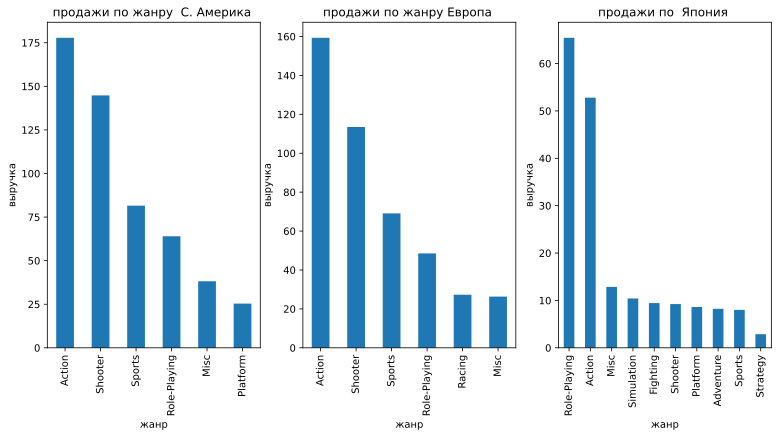

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(13,6))
ax=games_sales_actual.groupby('genre').na_sales.sum().sort_values(ascending= False).head(6).plot(kind='bar',ax=axes[0])
ax.set_title('продажи по жанру  С. Америка ')
ax.set(xlabel='жанр', ylabel='выручка');
ax=games_sales_actual.groupby('genre').eu_sales.sum().sort_values(ascending= False).head(6).plot(kind='bar',ax=axes[1])
ax.set_title('продажи по жанру Европа ')
ax.set(xlabel='жанр', ylabel='выручка');
ax=games_sales_actual.groupby('genre').jp_sales.sum().sort_values(ascending= False).head(10).plot(kind='bar',ax=axes[2])
ax.set_title('продажи по  Япония ')
ax.set(xlabel='жанр', ylabel='выручка');

Различий в предпочениях в топ 3 Северной Америке и Европе не замечено , Action спорт и шутеры являются лидерами по выручке. В менее популярных жанрах есть некоторые различия больше покупают платформеры, в Европе же чаще выбирают гонки.
В Японии значительные отличия  - на первом месте ролевые игры, причем с большим отрывом. Далее экшны и спортивные игры. Что еще важно шутеры в Японии на 10 месте . Возможно в Японии существуют законы ограничивающие этот жанр.



Влияние рейтинга ESRB на продажи в отдельном регионе.

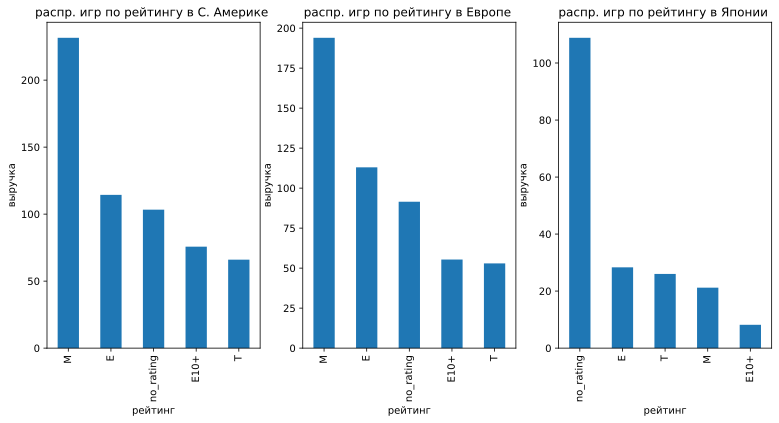

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(13,6))
ax=games_sales_actual.groupby('rating').na_sales.sum().sort_values(ascending= False).head(5).plot(kind='bar',ax=axes[0])
ax.set_title('распр. игр по рейтингу в С. Америке ')
ax.set(xlabel='рейтинг', ylabel='выручка');
ax=games_sales_actual.groupby('rating').eu_sales.sum().sort_values(ascending= False).head(5).plot(kind='bar',ax=axes[1])
ax.set_title('распр. игр по рейтингу в Европе ')
ax.set(xlabel='рейтинг', ylabel='выручка');
ax=games_sales_actual.groupby('rating').jp_sales.sum().sort_values(ascending= False).head(5).plot(kind='bar',ax=axes[2])
ax.set_title('распр. игр по рейтингу в Японии ')
ax.set(xlabel='рейтинг', ylabel='выручка');

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом M - "для лиц старше 17 лет" , затем с рейтингом E - "Для всех" и затем  практически поровну - с рейтингом T - "13-19 лет" и E10+ .no_rating столбец показывает сколько пропусков было в рейтингах. Как видно из графика пропуски занимают значительную часть от данных в Северной Америке и в Европе, и еще большую часть в Японии.

В Японии же игр  с рейтингом M - "для лиц старше 17 лет" значительно меньше  чем в Северной Америке и в Европе. Это скорее всего связано с тем что в Японии более напряженная учеба в университетах и в принципе. Еще одной причиной может быть то что игры по которым не указан рейтинг на первом месте по количеству в Японии и могут искажать результаты.

### Вывод
Был проведен анализ по регионам и определены сходства и различия . Были определены самые популярные платформы по регионам и самые популярные жанры и их различия. было выявлено что Япония значительно отличается от Северной Америке и в Европы
Также был составлен портрет игрока.

В Северной Америке наиболее вероятно что игрок - от 17 лет, любит играть на X360 или на  PS4, или на PS3 , предпочитает игры на реакцию и шутеры.
В Европе игрок - от 17 лет, любит играть на PS4 или на PS3, предпочитает игры на реакцию и шутеры. 
Японский игрок значительно младше  - от 10 лет, зачастую играет на переносных платформах 3DS или PS3 (основное отличие от рынка Северной Америки и Европы), предпочитает RPG и экшены.

<br/><a name="5."></a>
### Шаг 5. 

Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

- Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [69]:
XOne_user_score = games_sales_actual.query('platform == "XOne" and user_score > 0').user_score
PC_user_score = games_sales_actual.query('platform == "PC" and user_score > 0').user_score
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(XOne_user_score, PC_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Таким образом подтвердили нулевую гипотезу что средние пользовательские рейтинги платформ Xbox One и PC одинаковы между собой.

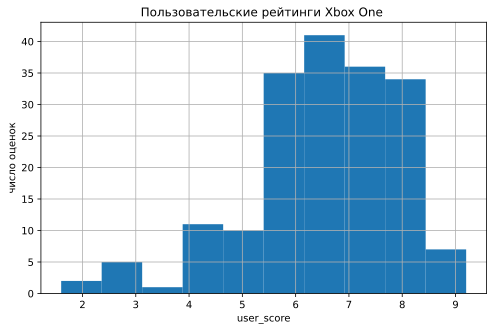

In [70]:
ax=XOne_user_score.hist();
ax.set_title('Пользовательские рейтинги Xbox One ')
ax.set(xlabel='user_score', ylabel='число оценок');

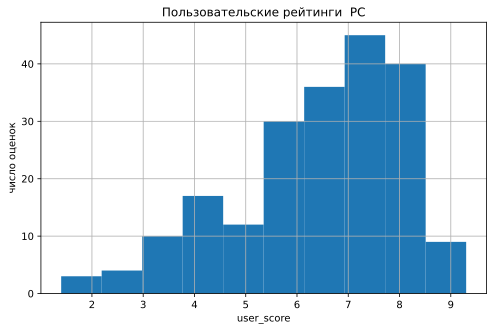

In [71]:
ax= PC_user_score.hist()
ax.set_title('Пользовательские рейтинги  PC')
ax.set(xlabel='user_score', ylabel='число оценок');

Вторая гипотеза :
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Н0 (нулевая гипотеза) - Средние пользовательские рейтинги жанров Action и Sports  одинаковые. 

Н1 (альтернативная гипотеза) - Средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [72]:
Action_user_score = games_sales_actual.query('genre == "Action" and user_score > 0').user_score
Sports_user_score = games_sales_actual.query('genre == "Sports" and user_score > 0').user_score
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(Action_user_score, Sports_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


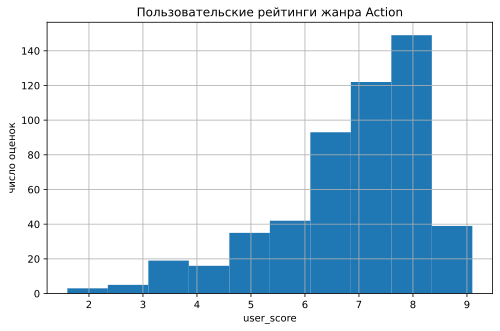

In [73]:
ax= Action_user_score.hist()
ax.set_title('Пользовательские рейтинги жанра Action')
ax.set(xlabel='user_score', ylabel='число оценок');

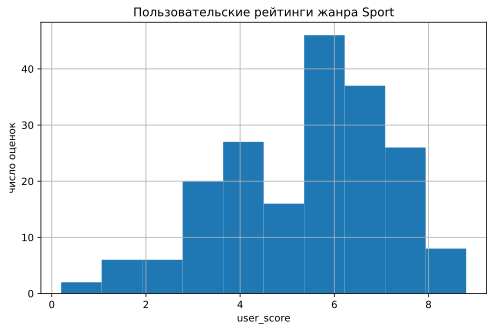

In [74]:
ax= Sports_user_score.hist()
ax.set_title('Пользовательские рейтинги жанра Sport')
ax.set(xlabel='user_score', ylabel='число оценок');

Отвергли нулевую гипотезу.
Таким образом, принимаем альтернативную гипотезу , что средние пользовательские рейтинги жанров Action и Sports разные.

Вывод по шагу 5.
- Первая гипотеза средние пользовательские рейтинги платформ Xbox One и PC одинаковые  подтвердилась .
- Вторая гипотеза  что средние пользовательские рейтинги жанров Action и Sports одинаковые не подтвердилась 


<br/><a name="6."></a>
### Шаг 6.

Шаг 6. Общий вывод

В ходе работы были проанализированы продажи по играм , выявлены лидеры рынка , различия по регионам и жанрам игр. Также даны ответы на вопросы и гипотезы .

В результате суммируя анализ можно сказать что существуют существенные различия по основным регионам продаж компьютерных игр. Значительней всего отличается Япония у них отличаются и лидеры рынка и популярные жанры игры и средний возраст игроков,производителям нужно учитывать эти различия. Также производителям игр необходимо учитывать, что наиболее распространенными категориями игр являются игры не требующие слишком сильно напрягаться. Еще одной важной тенденцией то что некоторые жанры несмотря на большое число игр приносят не так много выручки и производителям нужно внимательно оценить целесообразность выпуска таких игр. Также были определены жанры которые чаще всего приносят более высокую выручку чем другие.Эти жанры -Шутеры  их медиана примерно 0,45 млн долларов а третий квартиль 1.5 млн долларов, Жанр Platform тоже  выгоден , несмотря на то что медиана чуть больше 0,2 млн долларов третий квартиль находится на 0,7 млн долларов, и жанр "Sports" также весьма перспективен, медиана чуть больше 0.2 млн долларов а третий квартиль чуть меньше 0.8 млн долларов.

Также компаням следует обратить внимание на работу с критиками так как именно их оценки значительно коррелируют с увеличением выручки.

Еще одним важным фактором на который следует обратить внимание это период жизни платформ . Так за период в 10 лет даже самая популярная платформа стремительно теряет популярность и производителям игр нужно внимательно следить чтобы не выпустить игру на платформе которая потеряет популярность к моменту выхода игры, с учетом того что процесс разработки занимает 2-3 года а некоторых игр и больше 5.


<div style="border:solid indigo 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.2</b> 
    
👋 
      
Алексей, спасибо тебе за исправления критических моментов, а также спасибо за хорошую работу. Прошу тебя исправить формулировки по результатам тестов.
    
Поздравляю с успешным завершением проекта 🥳 🎉
    
И желаю успехов в новых работах 😊